Importing Dataset

In [1]:
#Importing Libraries:
import numpy as np
import pandas as pd

In [2]:
#Reading csv file and converting it in dataframe
ds= pd.read_csv('loan_prediction.csv')
df=pd.DataFrame(ds)
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Dataset in Dataframe format.
Classification Model

In [3]:
# Rows & Columns in dataset:

df.shape

(614, 13)

Dataset has 614 Rows and 13 Columns

In [4]:
# Datatype of dataset

df.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

There are 8 Object datatype and 5 numeric datatype
Target label is 'Loan_Status' which is of object type

In [6]:
#Null values 

df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are null values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History

In [7]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

Loan_ID: ['LP001002' 'LP001003' 'LP001005' 'LP001006' 'LP001008' 'LP001011'
 'LP001013' 'LP001014' 'LP001018' 'LP001020' 'LP001024' 'LP001027'
 'LP001028' 'LP001029' 'LP001030' 'LP001032' 'LP001034' 'LP001036'
 'LP001038' 'LP001041' 'LP001043' 'LP001046' 'LP001047' 'LP001050'
 'LP001052' 'LP001066' 'LP001068' 'LP001073' 'LP001086' 'LP001087'
 'LP001091' 'LP001095' 'LP001097' 'LP001098' 'LP001100' 'LP001106'
 'LP001109' 'LP001112' 'LP001114' 'LP001116' 'LP001119' 'LP001120'
 'LP001123' 'LP001131' 'LP001136' 'LP001137' 'LP001138' 'LP001144'
 'LP001146' 'LP001151' 'LP001155' 'LP001157' 'LP001164' 'LP001179'
 'LP001186' 'LP001194' 'LP001195' 'LP001197' 'LP001198' 'LP001199'
 'LP001205' 'LP001206' 'LP001207' 'LP001213' 'LP001222' 'LP001225'
 'LP001228' 'LP001233' 'LP001238' 'LP001241' 'LP001243' 'LP001245'
 'LP001248' 'LP001250' 'LP001253' 'LP001255' 'LP001256' 'LP001259'
 'LP001263' 'LP001264' 'LP001265' 'LP001266' 'LP001267' 'LP001273'
 'LP001275' 'LP001279' 'LP001280' 'LP001282' 'LP00128

There are nan values in Gender, Married, Dependents, Self_Employed, LoanAmount, Loan_Amount_Term and Credit_History

# Data Pre-Processing:

## Filling categorical columns with Mode Imputation:

There are 5 categorical columns: Gender, Married, Dependents,Self_Employed and Credit_History

In [8]:
# Filling nan value in dataset with mode
df['Gender'].fillna(df['Gender'].mode()[0],inplace=True)
df['Married'].fillna(df['Married'].mode()[0],inplace=True)
df['Dependents'].fillna(df['Dependents'].mode()[0],inplace=True)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0],inplace=True)

Categorical data having nan values with mode values.

In [9]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

nan values of Gender, Married, Dependents,Self_Employed and Credit_History removed.

In [11]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


Loan Amount and Loan Amount Term have outliers as difference between 75% and max is more so median method will be used for nan values 
Credit_History has no outliers so mean will be used for nan values.

<AxesSubplot:>

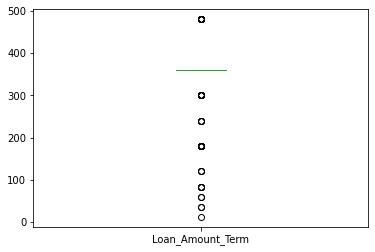

In [12]:
df['Loan_Amount_Term'].plot.box()

Loan_Amount_Term has outlier

<AxesSubplot:>

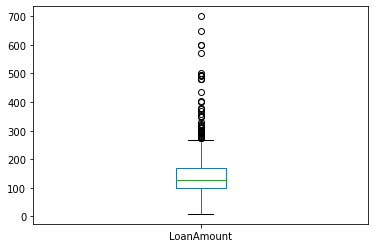

In [13]:
df['LoanAmount'].plot.box()

LoanAmount has outlier

<AxesSubplot:>

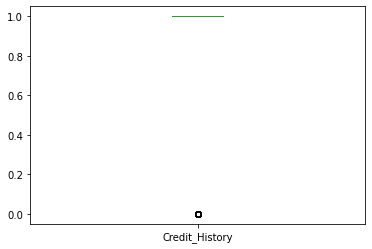

In [14]:
df['Credit_History'].plot.box()

credit history has small outliers.

As both the Numeric data have alot of outliers so using median for filling nan values.

In [15]:
df['LoanAmount'].fillna(df['LoanAmount'].median(),inplace=True)
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(),inplace=True)

LoanAmount and Loan_Amount_Term columns nan values removed using median imputation.

## Using Mean imputation:

In [16]:
df['Credit_History'].fillna(df['Credit_History'].mean(),inplace=True)

Credit_History column nan values removed using mean imputation.

In [17]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

All the nan values are filled and now there are no null values.

### Data cleaning:

Loan_ID is not required so dropping it 

In [18]:
df.drop(['Loan_ID'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


Loan_ID column dropped

In [119]:
# Checking Unique values of Dataset:

column_name =df.columns.values
for column in column_name:
    print("{0}: {1}".format(column, df[column].unique()))

Gender: ['Male' 'Female']
Married: ['No' 'Yes']
Dependents: ['0' '1' '2' '3+']
Education: ['Graduate' 'Not Graduate']
Self_Employed: ['No' 'Yes']
ApplicantIncome: [ 5849  4583  3000  2583  6000  5417  2333  3036  4006 12841  3200  2500
  3073  1853  1299  4950  3596  3510  4887  2600  7660  5955  3365  3717
  9560  2799  4226  1442  3750  4166  3167  4692  3500 12500  2275  1828
  3667  3748  3600  1800  2400  3941  4695  3410  5649  5821  2645  4000
  1928  3086  4230  4616 11500  2708  2132  3366  8080  3357  3029  2609
  4945  5726 10750  7100  4300  3208  1875  4755  5266  1000  3333  3846
  2395  1378  3988  2366  8566  5695  2958  6250  3273  4133  3620  6782
  2484  1977  4188  1759  4288  4843 13650  4652  3816  3052 11417  7333
  3800  2071  5316  2929  3572  7451  5050 14583  2214  5568 10408  5667
  2137  2957  3692 23803  3865 10513  6080 20166  2014  2718  3459  4895
  3316 14999  4200  5042  6950  2698 11757  2330 14866  1538 10000  4860
  6277  2577  9166  2281  3254 399

## Creating New variable

In [19]:
df['Total_Income']= df['ApplicantIncome'] + df['CoapplicantIncome']

In [20]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0


A new column named Total_Income is added and it contains Addition of ApplicantIncome and CoapplicantIncome

# EDA

## Visualisation

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

Y    422
N    192
Name: Loan_Status, dtype: int64


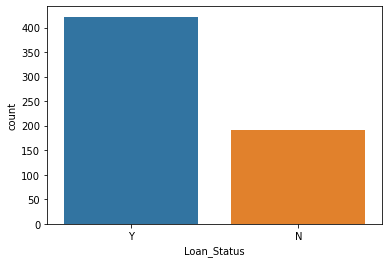

In [22]:
# Target Variable: Loan Status

ax=sns.countplot(x="Loan_Status", data=df)
print(df["Loan_Status"].value_counts())

Loan status has count of Yes = 422 and No = 192  so has class imbalance.

## Distplot for numeric datatype

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='ApplicantIncome', ylabel='Density'>

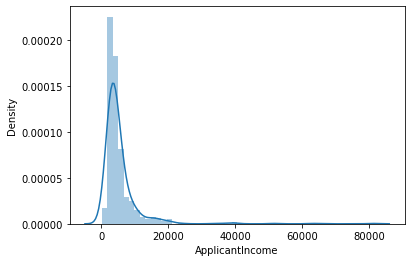

In [23]:
sns.distplot(df['ApplicantIncome'], kde=True)

Data is not equally distributed and has skewness

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='CoapplicantIncome', ylabel='Density'>

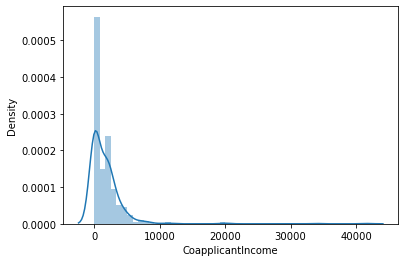

In [24]:
sns.distplot(df['CoapplicantIncome'], kde=True)

Data is not equally distributed and has skewness

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LoanAmount', ylabel='Density'>

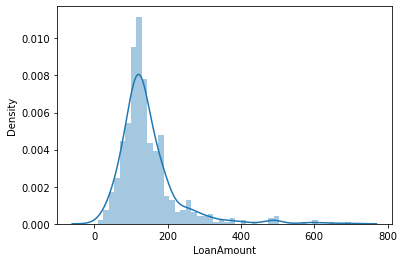

In [25]:
sns.distplot(df['LoanAmount'], kde=True)

Data is partially equally distributed and has skewness

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Loan_Amount_Term', ylabel='Density'>

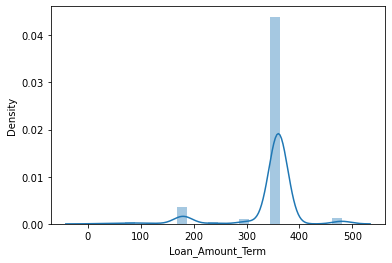

In [26]:
sns.distplot(df['Loan_Amount_Term'], kde=True)

Data is not equally distributed and has skewness

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Credit_History', ylabel='Density'>

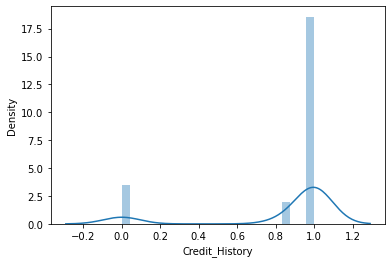

In [27]:
sns.distplot(df['Credit_History'], kde=True)

Data is not equally distributed and has skewness

D:\Anaconda\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Total_Income', ylabel='Density'>

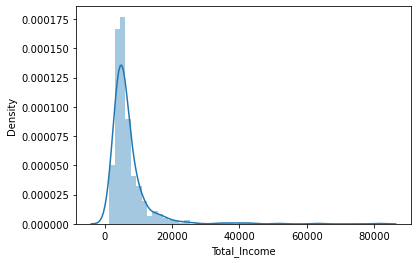

In [28]:
sns.distplot(df['Total_Income'], kde=True)

Data is not equally distributed and has skewness

## Plotting  categorical data

Male      502
Female    112
Name: Gender, dtype: int64


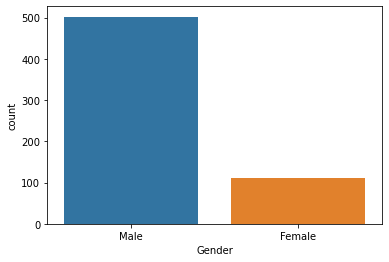

In [29]:
ax=sns.countplot(x="Gender", data=df)
print(df["Gender"].value_counts())

Male has higher count of 502 than female

Yes    401
No     213
Name: Married, dtype: int64


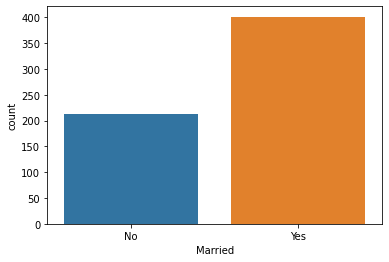

In [131]:
ax=sns.countplot(x="Married", data=df)
print(df["Married"].value_counts())

Maximum Loan is taken by Married population.

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64


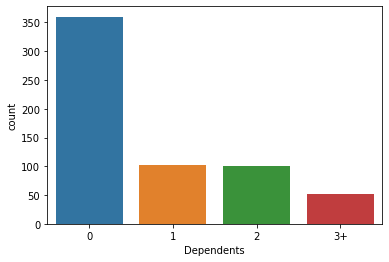

In [132]:
ax=sns.countplot(x="Dependents", data=df)
print(df["Dependents"].value_counts())

Population taking loan with zero dependents is higher in count.

Graduate        480
Not Graduate    134
Name: Education, dtype: int64


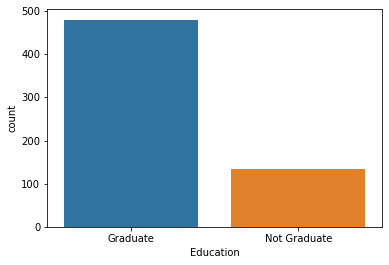

In [133]:
ax=sns.countplot(x="Education", data=df)
print(df["Education"].value_counts())

Population taking loan with Graduation in Education are higher in count.

No     532
Yes     82
Name: Self_Employed, dtype: int64


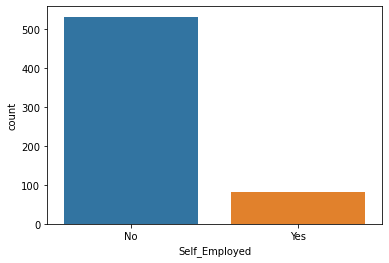

In [134]:
ax=sns.countplot(x="Self_Employed", data=df)
print(df["Self_Employed"].value_counts())

Population who are not self_employed are taking loan have higher count.

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64


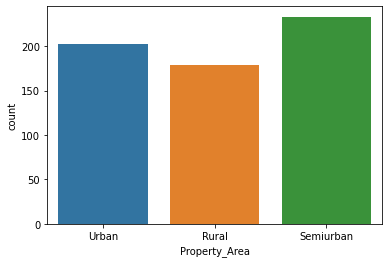

In [135]:
ax=sns.countplot(x="Property_Area", data=df)
print(df["Property_Area"].value_counts())

Semiurban population count is more than rural and urban  

<AxesSubplot:xlabel='count', ylabel='Credit_History'>

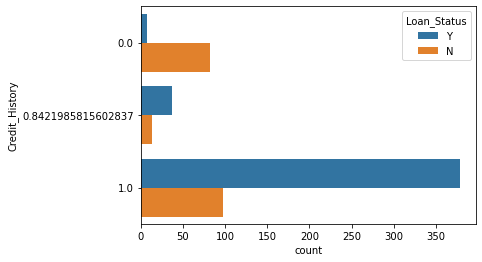

In [30]:
sns.countplot(y='Credit_History', hue='Loan_Status', data = df)

Poeple with Loan status as Yes have Credit history count of 350

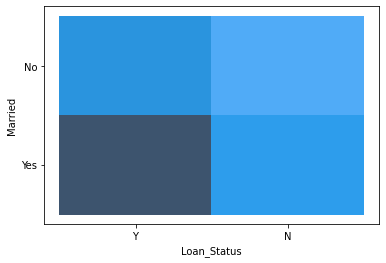

In [137]:
g=sns.histplot(x="Loan_Status",y="Married",data=df)

Maximum married people have taken loan.

<AxesSubplot:xlabel='count', ylabel='Self_Employed'>

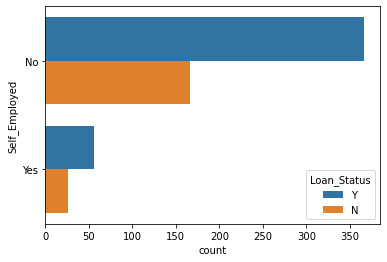

In [32]:
sns.countplot(y='Self_Employed', hue='Loan_Status', data = df)

Maximum people who are not self employed have taken loan.

<AxesSubplot:xlabel='count', ylabel='Property_Area'>

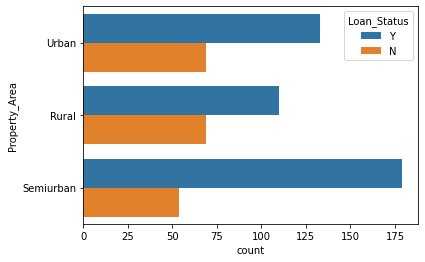

In [33]:
sns.countplot(y='Property_Area', hue='Loan_Status', data = df)

Maximum people living in Semiurban have taken loan in higher count.

## Label Encoding:

In [34]:
# Label Encoding for object to numeric datatype:
from sklearn.preprocessing import LabelEncoder
en= LabelEncoder()
for i in df.columns:
    if df[i].dtypes=="object":
        df[i]=en.fit_transform(df[i].values.reshape(-1,1))

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [140]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0


Object datatype encode to numeric datatype.

## Using SMOTE for Class Imbalance:

In [35]:
import sklearn
!pip install scikit-learn
!pip install -U imbalanced-learn

In [36]:
# SMOTE method :
from imblearn.over_sampling import SMOTE
dx=df.drop(['Loan_Status'], axis=1)
dy=df['Loan_Status'].values
smt=SMOTE()
trainx,trainy=smt.fit_resample(dx,dy)

SMOTE Technique helped to balance the target class.

D:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


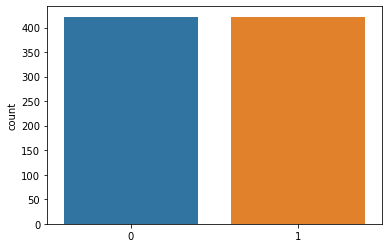

In [37]:
ax=sns.countplot(trainy)

Class Imbalance is corrected.

In [38]:
Loan_Status=pd.DataFrame(trainy)
Loan_Status.value_counts()

0    422
1    422
dtype: int64

Now count is 422 for both the value of 0 and 1.

In [39]:
# Adding New value of Loan_Status in the df dataset as Attritions

df['Loan_Status_new']=Loan_Status
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Loan_Status_new
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,1,5849.0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0,6091.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1,3000.0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1,4941.0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1,6000.0,1


New column named Loan_Status_new is added

## Dropping old value of Loan_Status

In [40]:
df.drop(['Loan_Status'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status_new
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,5849.0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,1


Dropped Loan_Status column

## Describing the dataset

In [41]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status_new
count,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000,614.000000
mean,0.817590,0.653094,0.744300,0.218241,0.133550,5403.459283,1621.245798,145.752443,342.410423,0.842199,1.037459,7024.705081,0.687296
std,0.386497,0.476373,1.009623,0.413389,0.340446,6109.041673,2926.248369,84.107233,64.428629,0.349681,0.787482,6458.663872,0.463973
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,12.000000,0.000000,0.000000,1442.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2877.500000,0.000000,100.250000,360.000000,1.000000,0.000000,4166.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3812.500000,1188.500000,128.000000,360.000000,1.000000,1.000000,5416.500000,1.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,5795.000000,2297.250000,164.750000,360.000000,1.000000,2.000000,7521.750000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,41667.000000,700.000000,480.000000,1.000000,2.000000,81000.000000,1.000000


Key Observations:

    1. Mean and Median: Values of mean and median are higher and lower for both so skewness is present. 
    2. 75% percentile and max: ApplicantIncome, CoapplicantIncome, LoanAmount and Total_Income have outliers
    3. Standard deviation is less than mean so high peak data

<AxesSubplot:>

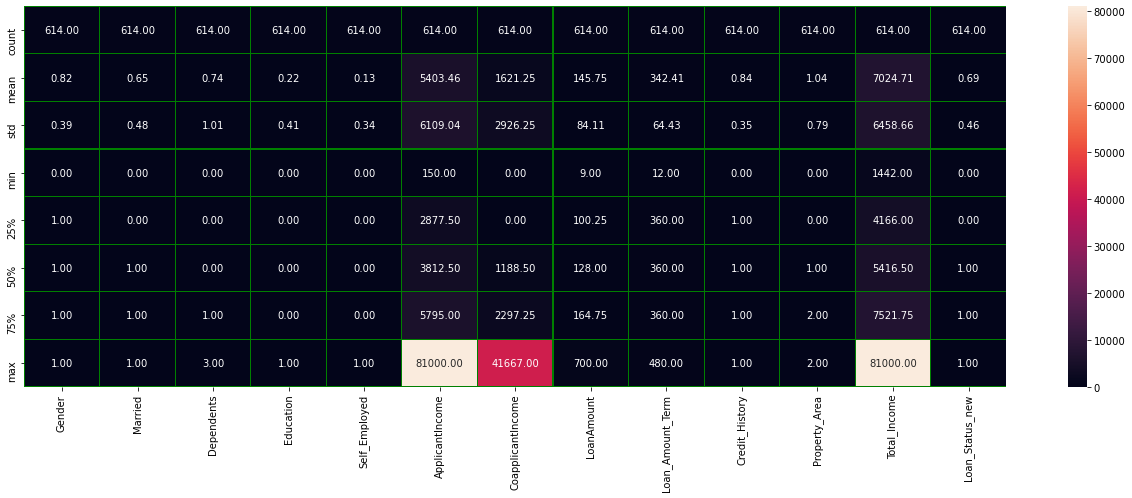

In [42]:
import matplotlib.pyplot as plt
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(),annot=True,linewidths=0.1,linecolor="Green",fmt="0.2f")

Heatmap representation of dataset description

## Outliers:

Gender                  AxesSubplot(0.125,0.816017;0.352273x0.0639831)
Married              AxesSubplot(0.547727,0.816017;0.352273x0.0639831)
Dependents              AxesSubplot(0.125,0.739237;0.352273x0.0639831)
Education            AxesSubplot(0.547727,0.739237;0.352273x0.0639831)
Self_Employed           AxesSubplot(0.125,0.662458;0.352273x0.0639831)
ApplicantIncome      AxesSubplot(0.547727,0.662458;0.352273x0.0639831)
CoapplicantIncome       AxesSubplot(0.125,0.585678;0.352273x0.0639831)
LoanAmount           AxesSubplot(0.547727,0.585678;0.352273x0.0639831)
Loan_Amount_Term        AxesSubplot(0.125,0.508898;0.352273x0.0639831)
Credit_History       AxesSubplot(0.547727,0.508898;0.352273x0.0639831)
Property_Area           AxesSubplot(0.125,0.432119;0.352273x0.0639831)
Total_Income         AxesSubplot(0.547727,0.432119;0.352273x0.0639831)
Loan_Status_new         AxesSubplot(0.125,0.355339;0.352273x0.0639831)
dtype: object

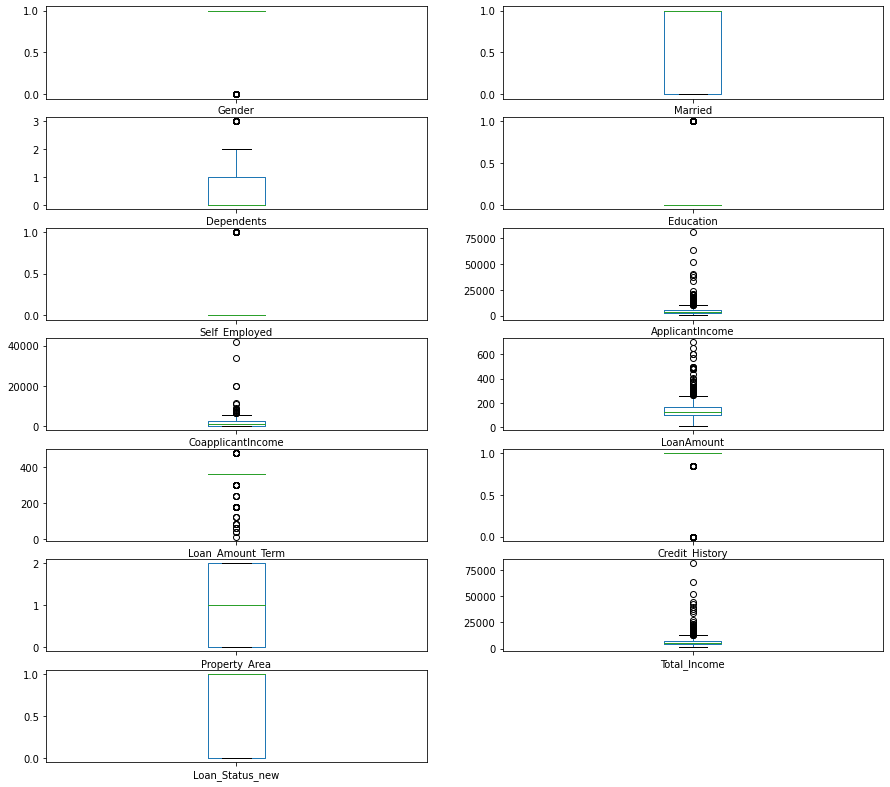

In [43]:
#Outliers:

df.plot(kind='box',subplots=True,layout=(10,2),figsize=(15,20))

Gender,Dependents,Applicant Income,CoApplicant Income, Loan Amount, Loan Amount Term and Total Income have high outliers.

In [44]:
# Removing Outliers: 

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 155, 171, 171, 171,
        177, 177, 183, 183, 185, 185, 242, 262, 278, 308, 313, 333, 333,
        333, 369, 402, 409, 409, 417, 432, 443, 443, 487, 495, 497, 506,
        506, 523, 525, 546, 561, 575, 581, 581, 585, 600, 600, 604],
       dtype=int64),
 array([ 6,  8,  8,  8,  5,  7,  8,  5,  7, 11,  5,  7, 11,  6,  7,  5, 11,
         5, 11,  8,  8,  7,  7,  8,  5,  7, 11,  7,  6,  5, 11,  6,  7,  5,
        11,  7,  8,  8,  7, 11,  7,  7,  8,  7,  8,  6, 11,  8,  6, 11,  7],
       dtype=int64))

In [45]:
#removing value greater than threshold value 

df_new=df[(z<3).all(axis=1)]
df_new

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status_new
0,1,0,0,0,0,5849,0.0,128.0,360.0,1.0,2,5849.0,1
1,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0
2,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,1
3,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,1
4,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0,2900,0.0,71.0,360.0,1.0,0,2900.0,1
610,1,1,3,0,0,4106,0.0,40.0,180.0,1.0,0,4106.0,1
611,1,1,1,0,0,8072,240.0,253.0,360.0,1.0,2,8312.0,1
612,1,1,2,0,0,7583,0.0,187.0,360.0,1.0,2,7583.0,1


Outliers removed.

In [46]:
df=df_new

In [47]:
df.shape

(577, 13)

Rows: 577, Columns: 13

### Percentage Loss of data

In [48]:
Data_loss=((614-577)/614)*100
Data_loss

6.026058631921824

6.02% data lost

## Correlation of the columns with the target columns:

In [49]:
df.corr()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status_new
Gender,1.000000,0.378997,0.188162,0.045696,-0.006207,0.026943,0.190543,0.158431,-0.104983,0.016566,-0.026340,0.128996,0.017408
Married,0.378997,1.000000,0.329900,0.024817,-0.015779,-0.008567,0.237322,0.164365,-0.127348,0.013364,0.010595,0.119828,0.089026
Dependents,0.188162,0.329900,1.000000,0.069814,0.044543,0.077227,-0.026220,0.135554,-0.087389,-0.017044,0.002327,0.060710,0.017872
Education,0.045696,0.024817,0.069814,1.000000,-0.007139,-0.166400,-0.037780,-0.149369,-0.090523,-0.080920,-0.068596,-0.181713,-0.092658
Self_Employed,-0.006207,-0.015779,0.044543,-0.007139,1.000000,0.250665,-0.039572,0.121562,-0.032914,-0.014899,-0.028253,0.221640,-0.026525
ApplicantIncome,0.026943,-0.008567,0.077227,-0.166400,0.250665,1.000000,-0.220975,0.439526,-0.052101,0.044016,-0.003641,0.850136,-0.005003
CoapplicantIncome,0.190543,0.237322,-0.026220,-0.037780,-0.039572,-0.220975,1.000000,0.312426,-0.058726,-0.019224,-0.093505,0.325688,0.045009
LoanAmount,0.158431,0.164365,0.135554,-0.149369,0.121562,0.439526,0.312426,1.000000,0.039696,0.007074,-0.078882,0.594777,-0.030169
Loan_Amount_Term,-0.104983,-0.127348,-0.087389,-0.090523,-0.032914,-0.052101,-0.058726,0.039696,1.000000,0.024041,-0.057004,-0.082216,-0.020291
Credit_History,0.016566,0.013364,-0.017044,-0.080920,-0.014899,0.044016,-0.019224,0.007074,0.024041,1.000000,-0.009747,0.032292,0.561857


correlation of input with target variable Income

<AxesSubplot:>

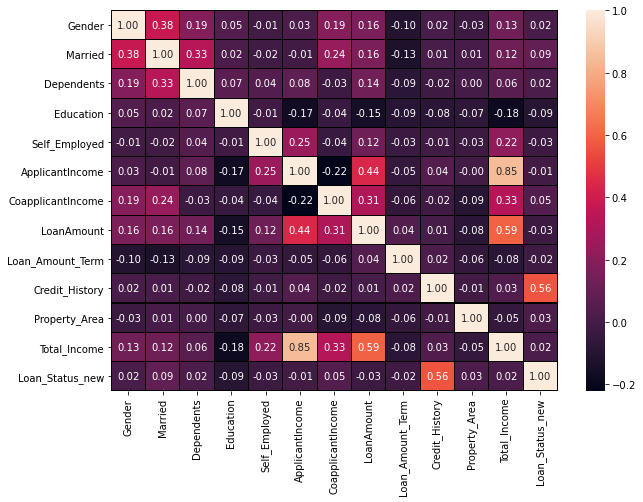

In [50]:
plt.figure(figsize=(10,7))
sns.heatmap(df.corr(),annot=True,linewidths=0.1,linecolor="Black",fmt="0.2f")

Key Observation:
 1. Loan_Status_new have positive correlation with Credit_History and negative correlation with Education.
 2. Credit_History has negative correlation with Education and positive correlation with Loan_Status_new.
 3. Multicollinearity exist

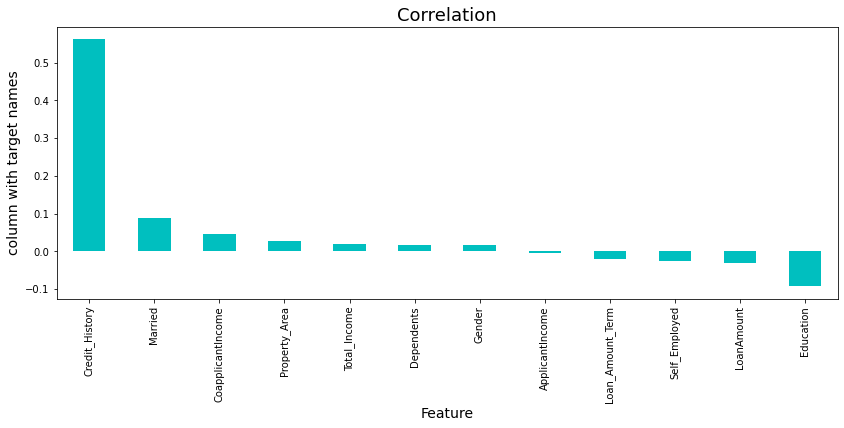

In [51]:
plt.figure(figsize=(14,5))
df.corr()['Loan_Status_new'].sort_values(ascending=False).drop(['Loan_Status_new']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('column with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

## Dropping Education Column

In [52]:
df.drop(['Education'],axis=1,inplace=True)
df.head()

,Gender,Married,Dependents,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Total_Income,Loan_Status_new
0,1,0,0,0,5849,0.0,128.0,360.0,1.0,2,5849.0,1
1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,6091.0,0
2,1,1,0,1,3000,0.0,66.0,360.0,1.0,2,3000.0,1
3,1,1,0,0,2583,2358.0,120.0,360.0,1.0,2,4941.0,1
4,1,0,0,0,6000,0.0,141.0,360.0,1.0,2,6000.0,1


Education column droppped

## Separating Target and feature variables

In [53]:
x =df.drop("Loan_Status_new",axis=1)
y =df["Loan_Status_new"]

### Multicollinearity removal using VIF

In [54]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [55]:
def vif_calc():
    vif=pd.DataFrame()
    vif["VIF Factor"]=[variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
    vif["features"]=x.columns
    print(vif)

VIF technique is used to remove Multicollinearity.

In [56]:
vif_calc()

    VIF Factor           features
0     6.146808             Gender
1     3.792172            Married
2     1.774428         Dependents
3     1.225239      Self_Employed
4          inf    ApplicantIncome
5          inf  CoapplicantIncome
6    11.248715         LoanAmount
7    12.736503   Loan_Amount_Term
8     6.227356     Credit_History
9     2.605280      Property_Area
10         inf       Total_Income


D:\Anaconda\lib\site-packages\statsmodels\stats\outliers_influence.py:193: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


LoanAmount and Loan_Amount_Term have higher VIF Factor so dropping Loan_Amount_Term

In [57]:
x.skew()

Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.151525
Loan_Amount_Term    -2.098806
Credit_History      -1.921860
Property_Area       -0.055332
Total_Income         1.681856
dtype: float64

Taking range of skewness between +/- 0.5
Self_Employed, ApplicantIncome,CoapplicantIncome,Loan_Amount_Term has higher skewness so need to remove it.

In [58]:
# Using power_transform to remove skewness.
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
x

array([[ 0.47713685, -1.36251079, -0.80924269, ...,  0.51523634,
         1.1948064 ,  0.19623673],
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.51523634,
        -1.34019905,  0.28585802],
       [ 0.47713685,  0.73393914, -0.80924269, ...,  0.51523634,
         1.1948064 , -1.40562884],
       ...,
       [ 0.47713685,  0.73393914,  0.90286851, ...,  0.51523634,
         1.1948064 ,  0.94618675],
       [ 0.47713685,  0.73393914,  1.34467098, ...,  0.51523634,
         1.1948064 ,  0.75607963],
       [-2.09583477, -1.36251079, -0.80924269, ..., -2.22500746,
         0.01546372, -0.36085235]])

Used power_transform to remove skewness.

In [59]:
# converting ndarray to dataframe
x=pd.DataFrame(x)

In [60]:
x.skew()

0    -1.622920
1    -0.630211
2     0.478360
3     2.252848
4     0.027981
5    -0.191876
6     0.048425
7     0.727533
8    -1.588827
9    -0.155094
10   -0.002577
dtype: float64

Still Column 0,7 and 8 has skewness so need to drop it but column 8 is highly correlated with target variable.

## Data Cleaning:

In [61]:
x.drop([0,7],axis=1,inplace=True)
x.head()

,1,2,3,4,5,6,8,9,10
0,-1.362511,-0.809243,-0.380580,0.681780,-1.122446,0.000771,0.515236,1.194806,0.196237
1,0.733939,0.902869,-0.380580,0.234783,0.744117,0.000771,0.515236,-1.340199,0.285858
2,0.733939,-0.809243,2.627567,-0.527201,-1.122446,-1.437336,0.515236,1.194806,-1.405629
3,0.733939,-0.809243,-0.380580,-0.791972,0.895786,-0.153545,0.515236,1.194806,-0.185746
4,-1.362511,-0.809243,-0.380580,0.728848,-1.122446,0.238260,0.515236,1.194806,0.252679


Column 0 and 7 dropped

## Scaling using Standard Scaler

In [62]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x=sc.fit_transform(x)
x

array([[-1.36251079, -0.80924269, -0.38058018, ...,  0.51523634,
         1.1948064 ,  0.19623673],
       [ 0.73393914,  0.90286851, -0.38058018, ...,  0.51523634,
        -1.34019905,  0.28585802],
       [ 0.73393914, -0.80924269,  2.62756724, ...,  0.51523634,
         1.1948064 , -1.40562884],
       ...,
       [ 0.73393914,  0.90286851, -0.38058018, ...,  0.51523634,
         1.1948064 ,  0.94618675],
       [ 0.73393914,  1.34467098, -0.38058018, ...,  0.51523634,
         1.1948064 ,  0.75607963],
       [-1.36251079, -0.80924269,  2.62756724, ..., -2.22500746,
         0.01546372, -0.36085235]])

Scaling of feature label done.

# Model Selection:

## Logistic Regression:

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
from sklearn.metrics import r2_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [ ]:
l=[]
for i in range(0,1000):
    train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.30,random_state=i)
    lr.fit(train_x,train_y)
    pred_train=lr.predict(train_x)
    pred_test=lr.predict(test_x)
    # 
    if round(accuracy_score(train_y,pred_train)*100,1)==round(accuracy_score(test_y,pred_test)*100,1):
        print("At random state",i,"The model performs very well")
        print("At random state:-",i)
        print("Training r2_score is:-",accuracy_score(train_y,pred_train)*100)
        print("Testing r2_score is:-",accuracy_score(test_y,pred_test)*100)
        l.append(i)

In [65]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.20,random_state=861)

In [66]:
print(classification_report(test_y,pred_test))

              precision    recall  f1-score   support

           0       0.35      0.21      0.26        38
           1       0.68      0.81      0.74        78

    accuracy                           0.61       116
   macro avg       0.51      0.51      0.50       116
weighted avg       0.57      0.61      0.58       116



In [67]:
pred_lr=lr.predict(test_x)
from sklearn.model_selection import cross_val_score
lss= accuracy_score(test_y,pred_lr)

for j in range(2,10):
    lsscore= cross_val_score(lr,x,y,cv=j)
    lsc=lsscore.mean()
    print("At cv:-",j)
    print("Cross validation score is:-", lsc*100)
    print("Accuracy score is:-", lss*100)

At cv:- 2
Cross validation score is:- 79.72474529027298
Accuracy score is:- 79.3103448275862
At cv:- 3
Cross validation score is:- 79.54987046632125
Accuracy score is:- 79.3103448275862
At cv:- 4
Cross validation score is:- 79.72341954022988
Accuracy score is:- 79.3103448275862
At cv:- 5
Cross validation score is:- 79.89955022488756
Accuracy score is:- 79.3103448275862
At cv:- 6
Cross validation score is:- 80.06872852233677
Accuracy score is:- 79.3103448275862
At cv:- 7
Cross validation score is:- 79.38793501532261
Accuracy score is:- 79.3103448275862
At cv:- 8
Cross validation score is:- 79.89916286149162
Accuracy score is:- 79.3103448275862
At cv:- 9
Cross validation score is:- 79.89850427350427
Accuracy score is:- 79.3103448275862


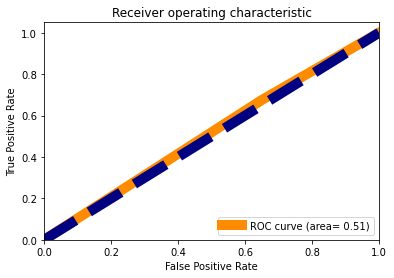

In [68]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred_test,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC curve value is 51% which is good.

In [69]:
# GridsearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
import warnings
warnings.filterwarnings('ignore')
alphav= {'alpha':[1,0.1,0.01,0.001,0.0001,0]}
model=Ridge()
grid= GridSearchCV(estimator=model,param_grid=alphav)
grid.fit(train_x,train_y)
print(grid)
print(grid.best_score_)
print(grid.best_estimator_.alpha)
print(grid.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0]})
0.27129100285561203
1
{'alpha': 1}


Best parameters for Ridge

In [70]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()
lr.fit(train_x,train_y)
print('lr score:',lr.score(train_x,train_y))
rd=Ridge(alpha=1)
rd.fit(train_x,train_y)
print('Score:', rd.score(train_x,train_y))
print(rd.coef_)
print('Score:', rd.score(train_x,train_y))

lr score: 0.8091106290672451
Score: 0.31535770890260817
[ 0.02590402  0.00318717  0.00129648 -0.03578946  0.02146459 -0.0498412
  0.24511408  0.02351881  0.05562032]
Score: 0.31535770890260817


lr score is 80%

## Decision Tree classifier

In [71]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dtc=DecisionTreeClassifier()
grid_param={
    'criterion':['gini','entropy']
  }
gd_sr=GridSearchCV(estimator=dtc,
                  param_grid=grid_param,
                  scoring='accuracy',
                  cv=5)
gd_sr.fit(train_x,train_y)
best_parameters=gd_sr.best_params_
print(best_parameters)
best_result=gd_sr.best_score_
print(best_result)

print(round(best_result,2))

{'criterion': 'entropy'}
0.7310191678354372
0.73


Best parameters for DecisionTreeClassifier

In [72]:
dtc= DecisionTreeClassifier(criterion='entropy')
dtc.fit(train_x,train_y)
dtc.score(train_x,train_y)

1.0

In [73]:
dtscore = cross_val_score(dtc,x,y,cv=9)
dts = dtscore.mean()
print('Cross Val Score:',dts*100)

Cross Val Score: 70.18162393162393


Cross Val Score: 70.7 %

In [74]:
#Predicted value
pred = dtc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion= confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.6379310344827587
Confusion Matrix:  [[21 17]
 [25 53]]


Accuracy of Decision Tree Classifier model is 63.7%

## SVM(SVC)

In [92]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm
parameters={'kernel':['linear','rbf'],'C':[1,10]}
svc=svm.SVC()
clf= GridSearchCV(svc,parameters)
clf.fit(train_x,train_y)
print(clf.best_params_)

{'C': 1, 'kernel': 'linear'}


Best parameters for SVC

In [93]:
sv=svm.SVC(kernel='linear',C=1)
sv.fit(train_x,train_y)
sv.score(train_x,train_y)

0.8221258134490239

SV Score: 82.2%

In [94]:
#Predicted value
pred = sv.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7931034482758621
Confusion Matrix:  [[15 23]
 [ 1 77]]


Accuracy of the model is: 79.3%

In [95]:
svscore = cross_val_score(sv,x,y,cv=9)
svs = svscore.mean()
print('Cross Val Score:',svs*100)

Cross Val Score: 81.6292735042735


Cross Val Score: 81.6 %

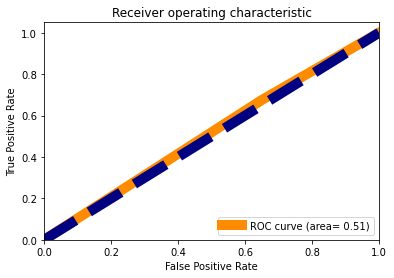

In [96]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds= roc_curve(pred_test,test_y)
roc_auc = auc(fpr,tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange',lw=10, label='ROC curve (area= %0.2f)' % roc_auc)
plt.plot([0,1],[0,1], color='navy', lw=10,linestyle='--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc='lower right')
plt.show()

ROC curve value is 51% which is good.

## RandomForestClassifier

In [84]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()

forest_params = [{'max_depth': list(range(10, 15)), 'max_features': list(range(0,14))}]

clf = GridSearchCV(rfc, forest_params, cv = 10, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

{'max_depth': 11, 'max_features': 2}


Best parameters for RandomForestClassifier 

In [85]:
rfc= RandomForestClassifier(max_depth=11,max_features=2)
rfc.fit(train_x,train_y)
rfc.score(train_x,train_y)

0.9739696312364425

In [86]:
#Predicted value
pred = rfc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7586206896551724
Confusion Matrix:  [[15 23]
 [ 5 73]]


Accuracy of the model is: 75.8%

In [87]:
rfscore = cross_val_score(rfc,x,y,cv=9)
rfs = rfscore.mean()
print('Cross Val Score:',rfs*100)

Cross Val Score: 80.9375


Cross Val Score:80.9%

## KNeighbors Classifier

In [80]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

knc=KNeighborsClassifier()

parameters = {'n_neighbors':list(range(0,10)),
              'weights':['uniform', 'distance'],
              'algorithm':['auto', 'ball_tree', 'kd_tree', 'brute']
              }

clf = GridSearchCV(knc, parameters, cv=9, scoring='accuracy')

clf.fit(train_x,train_y)
    
print(clf.best_params_)

{'algorithm': 'auto', 'n_neighbors': 9, 'weights': 'uniform'}


Best parameters for KNeighborsClassifier

In [81]:
knc= KNeighborsClassifier(algorithm='auto',n_neighbors=9,weights='uniform')
knc.fit(train_x,train_y)
knc.score(train_x,train_y)

0.8351409978308026

In [82]:
#Predicted value
pred = knc.predict(test_x)
from sklearn.metrics import accuracy_score, confusion_matrix
accuracy=accuracy_score(test_y,pred)
confusion=confusion_matrix(test_y,pred)
print("Accuracy of the model is: ",accuracy)
print("Confusion Matrix: ", confusion)

Accuracy of the model is:  0.7672413793103449
Confusion Matrix:  [[13 25]
 [ 2 76]]


Accuracy of the model is: 76.7%

In [83]:
knscore = cross_val_score(knc,x,y,cv=7)
kns = knscore.mean()
print('Cross Val Score:',kns*100)

Cross Val Score: 80.42693421770706


Cross Val Score: 80.4%

## Best Model is SVC as it has Accuracy of 79.3% and Cross val score of 81.6%

# Model saving:

In [88]:
import pickle
filename = 'Loan_prediction.pkl'
pickle.dump(sv, open(filename, 'wb'))

## Accuracy:

In [89]:
loaded_model = pickle.load(open('Loan_prediction.pkl', 'rb'))
result = loaded_model.score(test_x, test_y)
print(result)

0.7931034482758621


Accuracy of 79.3% so model performing well

## Conclusion:

In [90]:
import numpy as np
a=np.array(test_y)
pred_decision =np.array(sv.predict(test_x))
df_com=pd.DataFrame({"original":a, "predicted": pred},index=range(len(a)))
df_com

,original,predicted
0,0,1
1,1,1
2,1,1
3,1,1
4,1,1
...,...,...
111,1,1
112,1,1
113,0,1
114,1,1


As per observation the predicted and actual data are almost same.